In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
sex = df['Sex'].value_counts().reset_index()
sex

,Sex,count
0,M,725
1,F,193


In [10]:
ChestPainType = df['ChestPainType'].value_counts().reset_index()
ChestPainType

,ChestPainType,count
0,ASY,496
1,NAP,203
2,ATA,173
3,TA,46


In [11]:
RestingECG = df['RestingECG'].value_counts().reset_index()
RestingECG

,RestingECG,count
0,Normal,552
1,LVH,188
2,ST,178


In [12]:
ExerciseAngina = df['ExerciseAngina'].value_counts().reset_index()
ExerciseAngina

,ExerciseAngina,count
0,N,547
1,Y,371


In [13]:
ST_Slope = df['ST_Slope'].value_counts().reset_index()
ST_Slope

,ST_Slope,count
0,Flat,460
1,Up,395
2,Down,63


In [14]:
HeartDisease = df['HeartDisease'].value_counts().reset_index()
HeartDisease

,HeartDisease,count
0,1,508
1,0,410


In [15]:
le = LabelEncoder()

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

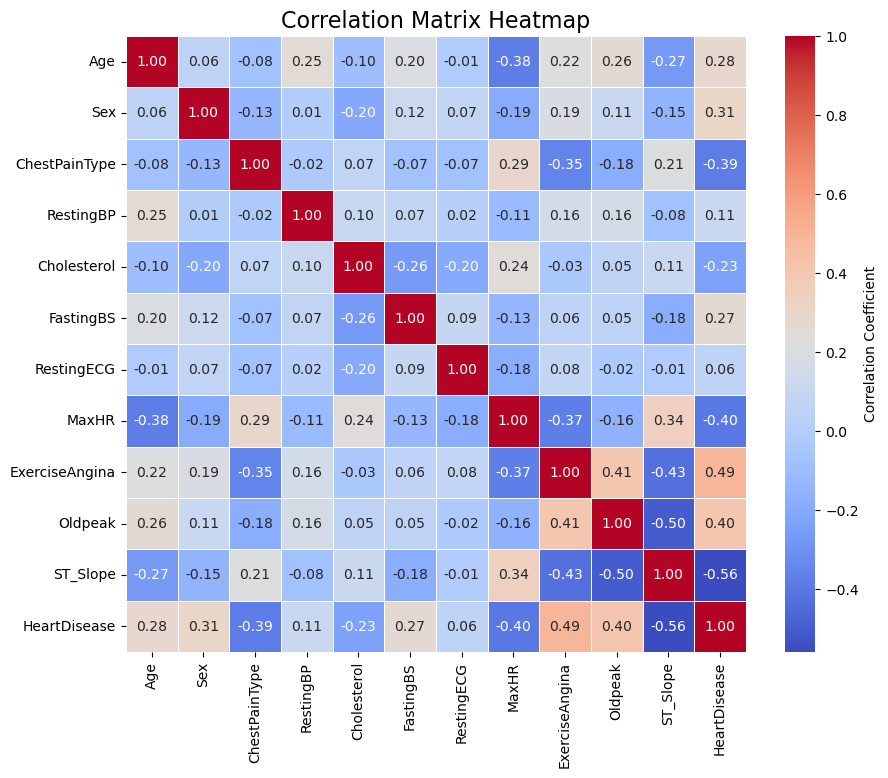

In [16]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [17]:
x = df.drop(columns = 'HeartDisease',axis=1)
y = df['HeartDisease']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [24]:
randomforest = RandomForestClassifier(n_estimators=30)

In [25]:
randomforest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [26]:
randomforest.score(x_test,y_test)

0.8532608695652174

In [27]:
y_pred1 = randomforest.predict(x_test)
y_pred1

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        81
           1       0.87      0.87      0.87       103

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [29]:
import pickle
filename = 'heartdisease.sav'
pickle.dump(randomforest,open(filename, 'wb'))

In [30]:
import pickle
pickle.dump(randomforest , open('heart_disease.pkl' , 'wb'))

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

#from imblearn.over_sampling import RandomOverSampler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [32]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # (0.001)minimium amount of change to count as an improvement
    patience = 10,     #(20) how many epochs to wait before stopping
    restore_best_weights = True,
)

model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = [x_train.shape[1]]),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [33]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    batch_size = 20,
    epochs = 500,
    callbacks = [early_stopping]
)

Epoch 1/500
37/37 [==============================] - 1s 11ms/step - loss: 2.9030 - accuracy: 0.6008 - val_loss: 4.5720 - val_accuracy: 0.5598
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 2.1989 - accuracy: 0.6144 - val_loss: 0.7924 - val_accuracy: 0.7609
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 1.8317 - accuracy: 0.6308 - val_loss: 1.8212 - val_accuracy: 0.6196
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 1.7741 - accuracy: 0.6676 - val_loss: 2.0730 - val_accuracy: 0.6141
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 1.4055 - accuracy: 0.6948 - val_loss: 1.3678 - val_accuracy: 0.6196
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 1.8523 - accuracy: 0.6349 - val_loss: 0.6406 - val_accuracy: 0.7772
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 1.2770 - accuracy: 0.7234 - val_loss: 0.5872 - val_accuracy: 0.7989
Epoch 8/500


In [34]:
# Getting the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

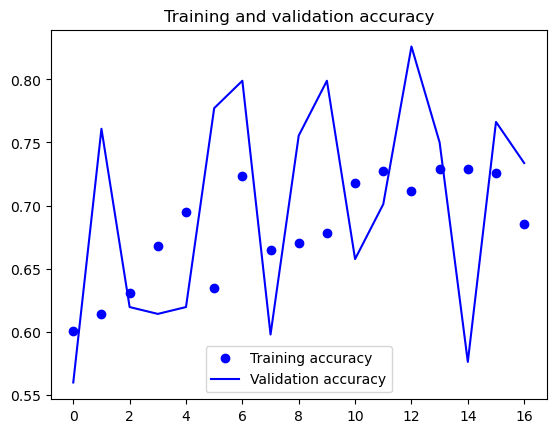

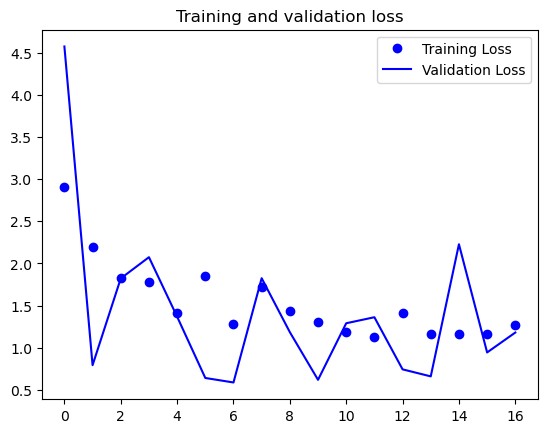

In [35]:
# Plotting the accuracy
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting the loss
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [36]:
y_pred = np.where(model.predict(x_test) >= 0.5, 1, 0)

6/6 [==============================] - 0s 4ms/step


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        81
           1       0.82      0.82      0.82       103

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184

